In [1]:
!nvidia-smi

Sat Aug  7 12:29:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###패키지 import

In [2]:
import os
#이미지 처리 패키지
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

###데이터 셋 다운

In [3]:
!wget https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -q captcha_images_v2.zip

--2021-08-07 12:34:00--  https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip [following]
--2021-08-07 12:34:00--  https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9075967 (8.7M) [application/zip]
Saving to: ‘captcha_images_v2.zip’

captcha_images_v2.z 100%[===================>]   8.66M  --.-KB/s    in 0.07s   

2021-08-07 12:34:01 (127 MB/s) - ‘captcha_images_v2.z

###데이터 셋 

In [5]:
img_list = glob('captcha_images_v2/*.png')

len(img_list)

1040

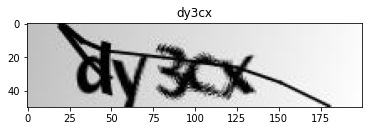

In [6]:
img = cv2.imread(img_list[0])

label = os.path.splitext(os.path.basename(img_list[0]))[0]

plt.title(label)
plt.imshow(img)

##데이터 전처리

In [8]:
imgs = []
labels = []
max_length = 0

for img_path in img_list:
    imgs.append(img_path)

    label=os.path.splitext(os.path.basename(img_path))[0]
    labels.append(label)

    if len (label) > max_length:
        max_length=len(label)
    
print(len(imgs), len(labels), max_length)

1040 1040 5


In [9]:
''.join(labels)

'dy3cxwxcn8ny3dwnbp3ec353e7wn744ycex7bb7bdbex3bbymyc2fb763824yyg5ggw53m74eygc4mcm6c3n6f753f2xc2n3fbxdw6yne2fxgdybfx64d22myxd7myy824pyf65n6f4b67deyc2g4de7x45mgdwb2bg4856ncx8684mpwmbnm67b333f7mx742225w53c86mdgfbx66fn84gymmnbefbd7yf62b5pnn23n88d3c8ypgmn2b685n7y2x45ep3ngbxyy6e554gxxpfm3b5pf228npdyc8gng6egfp543p67ndc436n4wwny3c585x5nxc7gb3mbf5844xe8ccn2xgpxng3ygdeyg5bbp2dw733n73cm6ybnnn5pw75w8bwmeey2ye8nnp4e467d5e8e5e243mm28x47en4n4x37bf6pwcndw3nn244e2efx34edg3p4cn7bc6we6p8ngx34fxmcffp4pg2yx47m2bcdcb3gy4338n5pnw52fn6825ygegw4pxne8b2g8epf4nbgw468defyxyw667n2gmg4dgf7bp6mwwc2bd3dgmfmcc2xn3m6xy5n6d2nbcxyd3m3664nf2pfpnpcm7f8gmnxgm6nn46mbm4c8n8b43nwmfc35b55d6d378ndeep5fg38b3g2w6pn7pnefgx5nbmx75bgp2xf4p4mdxpn2cgyxfg8n4cpe63nfcwy8y63fpe4xnp2ym2c753em5megxemyg77wp4e84n223mdg8nn732w4y7ny3nnmm3nn8ne4gfpw7688y527pn5gn5wbg3p4nne43ymw2n7e85622p4nm4pw5nccwdnxmggcen6xc5dd764wnpecbmxpe3n7mxebcbxf22bnx3deb76nxnycnfcxymfnyf424268g2mmg2m8npe3g2577bgd4m537nf226mdypp8fyf28d56c34xmcympyefbbgb485f3gfcnex4xxw44e667

In [10]:
characters = set(''.join(labels))
characters

{'2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y'}

###라벨 숫자로 인코딩

In [14]:
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=0,mask_token=None
)

num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), num_oov_indices=0, mask_token=None, invert=True
)

print(labels[0])
encoded = char_to_num(tf.strings.unicode_split(labels[0], input_encoding='UTF-8'))
print(encoded)

dy3cx
tf.Tensor([ 1 11  9  6 12], shape=(5,), dtype=int64)


In [18]:
tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')

'dy3cx'

###훈련 셋과 테스트 셋 분리

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.1, random_state=20211537)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

936 936
104 104


###데이터 생성기 제작

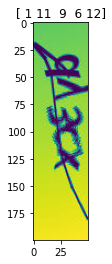

In [21]:
img_width = 200
img_height = 50

def encode_single_sample(img_path, label):
  # 1. Read image
  img = tf.io.read_file(img_path)
  # 2. Decode and convert to grayscale
  img = tf.io.decode_png(img, channels=1)
  # 3. Convert to float32 in [0, 1] range
  img = tf.image.convert_image_dtype(img, tf.float32)
  # 4. Resize to the desired size
  img = tf.image.resize(img, [img_height, img_width])
  # 5. Transpose the image because we want the time
  # dimension to correspond to the width of the image.
  img = tf.transpose(img, perm=[1, 0, 2])
  # 6. Map the characters in label to numbers
  label = char_to_num(tf.strings.unicode_split(label, input_encoding='UTF-8'))
  # 7. Return a dict as our model is expecting two inputs
  return {'image': img, 'label': label}

preview = encode_single_sample(imgs[0], labels[0])

plt.title(str(preview['label'].numpy()))
plt.imshow(preview['image'].numpy().squeeze())

In [22]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

print(train_dataset)
print(validation_dataset)

<PrefetchDataset shapes: {image: (None, 200, 50, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>
<PrefetchDataset shapes: {image: (None, 200, 50, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>


##모델 - CTC

In [23]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_length = tf.cast(tf.shape(y_pred)[1], dtype='int64')
        label_length = tf.cast(tf.shape(y_true)[1], dtype='int64')

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name='image', dtype='float32'
    )
    labels = layers.Input(name='label', shape=(None,), dtype='float32')

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv1',
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv2',
    )(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation='softmax', name='dense2'
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name='ctc_loss')(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name='ocr_model_v1'
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 200, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 200, 50, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 100, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 100, 25, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

##모델 학습

In [24]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
30/30 [==============================] - 40s 94ms/step - loss: 24.9204 - val_loss: 16.3112
Epoch 2/100
30/30 [==============================] - 1s 47ms/step - loss: 16.3468 - val_loss: 16.3254
Epoch 3/100
30/30 [==============================] - 1s 47ms/step - loss: 16.3192 - val_loss: 16.2934
Epoch 4/100
30/30 [==============================] - 1s 49ms/step - loss: 16.3151 - val_loss: 16.2932
Epoch 5/100
30/30 [==============================] - 1s 48ms/step - loss: 16.3154 - val_loss: 16.2924
Epoch 6/100
30/30 [==============================] - 1s 47ms/step - loss: 16.3144 - val_loss: 16.2921
Epoch 7/100
30/30 [==============================] - 1s 47ms/step - loss: 16.3120 - val_loss: 16.2904
Epoch 8/100
30/30 [==============================] - 1s 46ms/step - loss: 16.3119 - val_loss: 16.2945
Epoch 9/100
30/30 [==============================] - 1s 46ms/step - loss: 16.3085 - val_loss: 16.2911
Epoch 10/100
30/30 [==============================] - 1s 49ms/step - loss: 16.302

##테스트 셋 검증

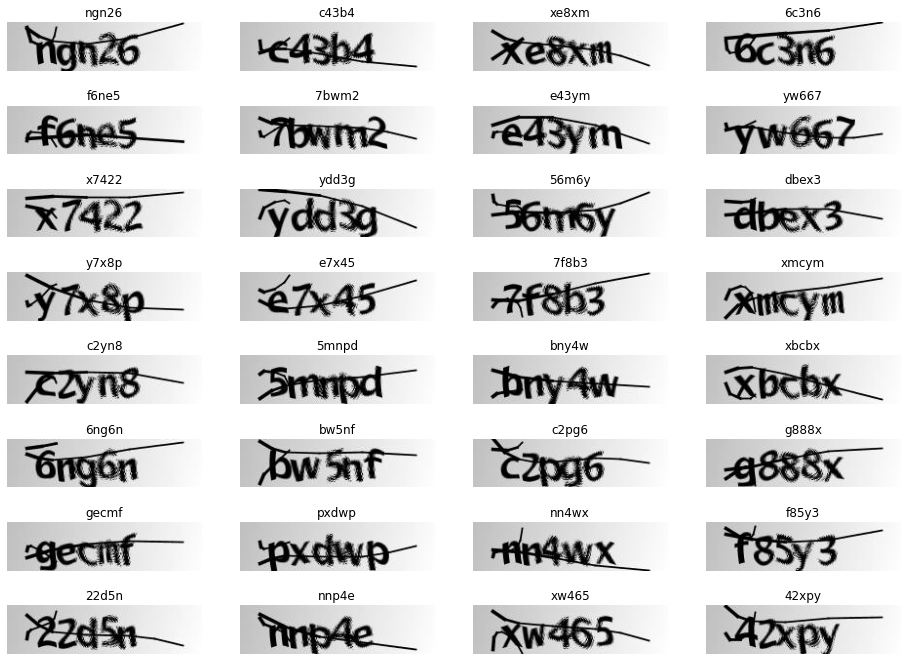

In [25]:
prediction_model = keras.models.Model(
  model.get_layer(name='image').input, model.get_layer(name='dense2').output
)

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode('utf-8')
        output_text.append(res)
    return output_text

for batch in validation_dataset.take(1):
    batch_images = batch['image']

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    _, axes = plt.subplots(8, 4, figsize=(16, 12))

    for img, text, ax in zip(batch_images, pred_texts, axes.flatten()):
        img = img.numpy().squeeze()
        img = img.T

        ax.imshow(img, cmap='gray')
        ax.set_title(text)
        ax.set_axis_off()